### Final Project INFO 6105
> <div class="alert alert-block alert-info">
<b>Authors:</b> Mohit Negi
                ,Sumit Patil
                ,Yashwanth Reddy
    </div>


In [33]:
# Imports
import pandas as pd
import numpy as np

# Plots and designing
import seaborn as sns
import cufflinks as cf
import colorlover as cl
import plotly.express as px
from matplotlib import pyplot
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

init_notebook_mode(connected=True)
cf.go_offline()

# Colors
#maroon = rgb(128,0,0)
#chocolate = rgb(210,105,30)
#sky blue = rgb(135,206,235)
#olive drab = rgb(107,142,35)
#steel blue = rgb(70,130,180)

#Statistics & data manupulation
import shap
import seaborn as sns
import pmdarima as pm
import xgboost as xgb
from math import sqrt
import plotly.offline as py
from keras.layers import Dense
from numpy import concatenate
from datetime import datetime
import statsmodels.api as sm
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.models import Sequential
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from pmdarima.arima import auto_arima
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

py.init_notebook_mode(connected=True)
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>XGBoost Model</b></div>

<div class="alert alert-block alert-info">
<b>Dataset</b> Importing the Excel file with multiple sheets</div>

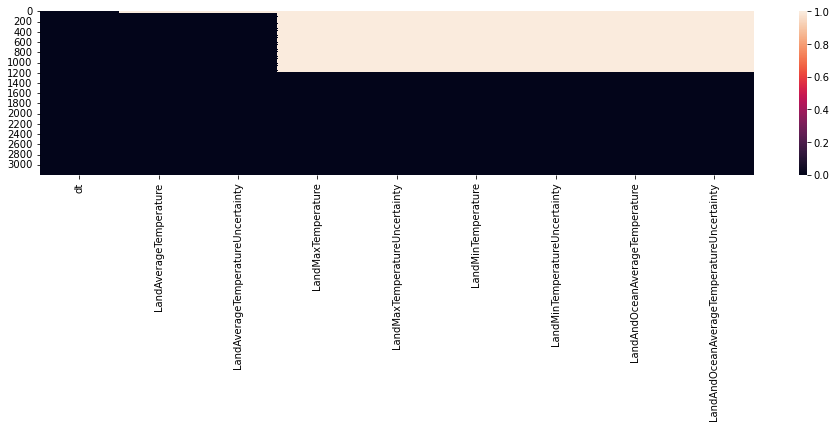

In [34]:
# Read the data
data = pd.read_csv(r"X:\Fall21\INFO6105\Final_Project\data-society-global-climate-change-data\GlobalLandTemperatures\GlobalTemperatures.csv")
data.head(2)
# Make a copy of the data for future graphs
copy = data.copy()
# Missing values
data.isna().sum() # there are 1200 missing values for Max, Min and Land&Ocean Average Temp
plt.figure(figsize = (16, 3))
sns.heatmap(data.isna())

In [35]:
# Missing data with listwise deletion
# Because data is missing in chucks and we are dealing with time series data, we will delete all rows that have at least 
# one missing value.
data.dropna(axis = 0, inplace = True)
# Dealing with the DATE
data['Date'] = pd.to_datetime(data.dt) # converted all dates to the same format

data2 = data.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

# Week data is not evenly distributed
data2['week'].value_counts() # very uneven information on weeks

# For future analysis, we will work only on yearly data, as average (because there are dates missing and data is not consistent)
globe_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

globe_data['turnpoint'] = np.where(globe_data['year'] <= 1975, 'before', 'after') # creating a new columns
# Simple Summary Statistics
globe_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              166.000000          166.000000          166.000000   
mean                 8.571583           14.350601            2.743595   
std                  0.473687            0.447741            0.614124   
min                  7.558583           13.081000            1.525083   
25%                  8.195708           14.055917            2.262562   
50%                  8.540750           14.307708            2.734917   
75%                  8.791250           14.539167            3.126833   
max                  9.831000           15.572667            4.148833   

       LandAndOceanAverageTemperature  
count                      166.000000  
mean                        15.212566  
std                          0.298629  
min                         14.740083  
25%                         14.991208  
50%                         15.144208  
75%                         15.379104  
max                         16.058583

<div class="alert alert-block alert-info">
<b>EDA</b></div>

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


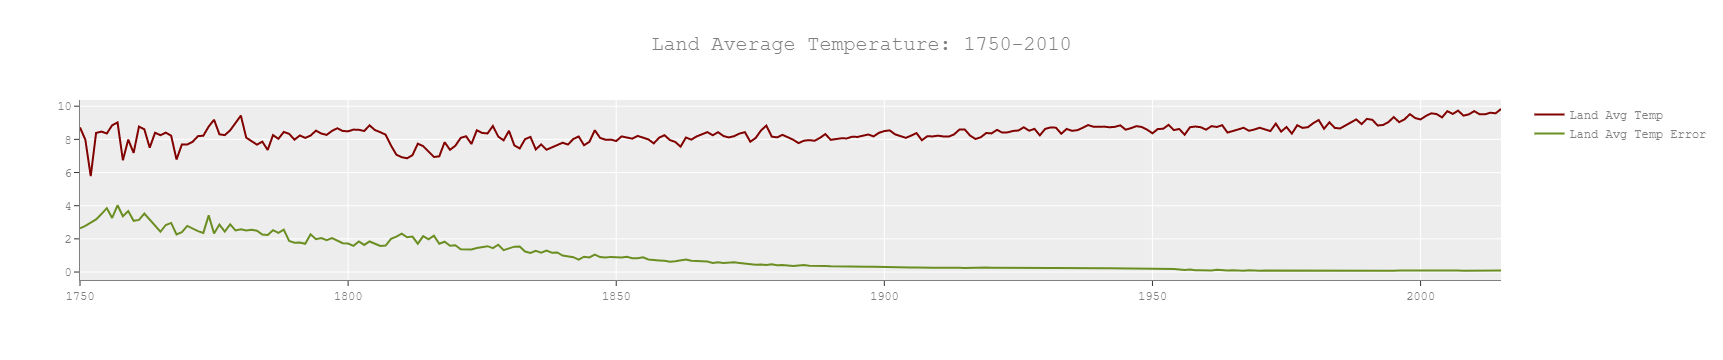

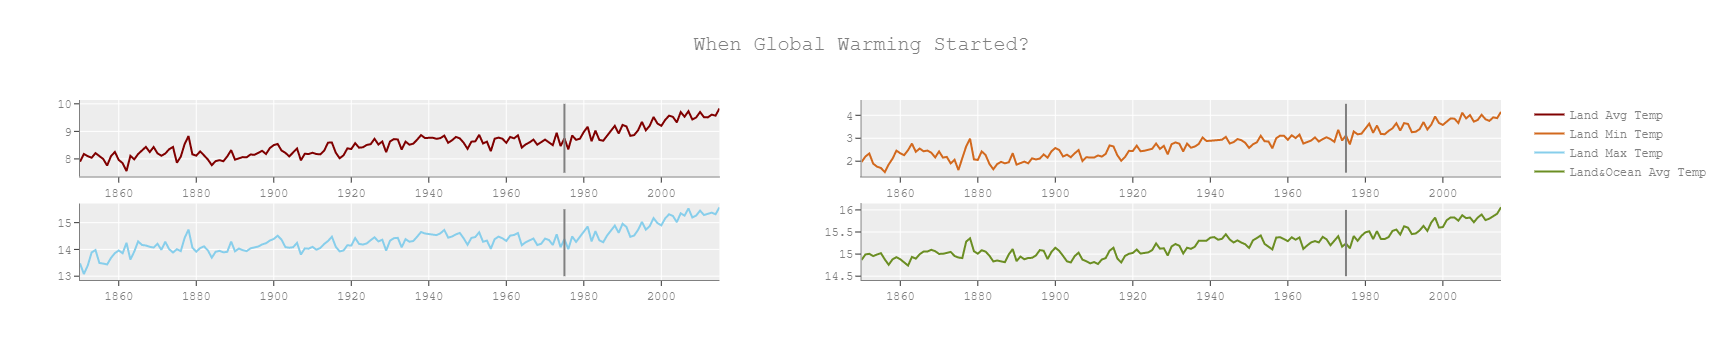

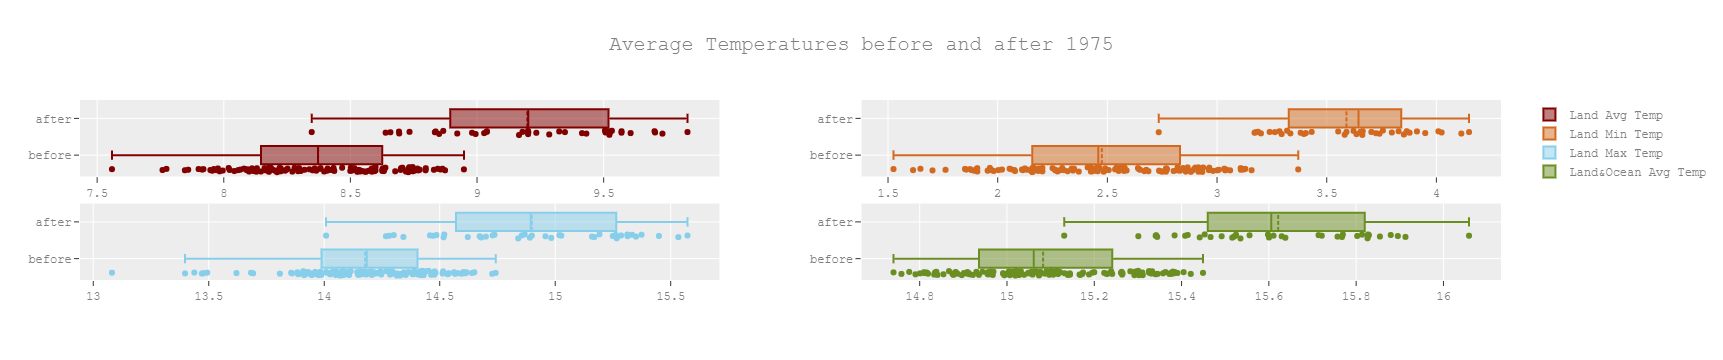

In [36]:
# Creating the dataset - using copy
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 1, 0)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))
fig.show()

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')


# Figure data
fig.add_trace(go.Scatter(x = globe_data['year'], y = globe_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = globe_data['year'], y = globe_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = globe_data['year'], y = globe_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = globe_data['year'], y = globe_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="grey"), showlegend=False),
             row = 2, col = 2)
# Change in average temperature before/after 1975
fig.show()

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = globe_data['LandAverageTemperature'], y = globe_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = globe_data['LandMinTemperature'], y = globe_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = globe_data['LandMaxTemperature'], y = globe_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = globe_data['LandAndOceanAverageTemperature'], y = globe_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

<div class="alert alert-block alert-info">
<b>EDA</b> Explanatory Data Analysis</div>

In [37]:
# Read the file (countries + cities)
countries = pd.read_csv(r"X:\Fall21\INFO6105\Final_Project\data-society-global-climate-change-data\GlobalLandTemperaturesByCity.csv")

# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Group by year
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

# Append the continent & iso codes
continent_map = pd.read_csv(r"X:\Fall21\INFO6105\Final_Project\data-society-global-climate-change-data\continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

# Datasets:

region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()

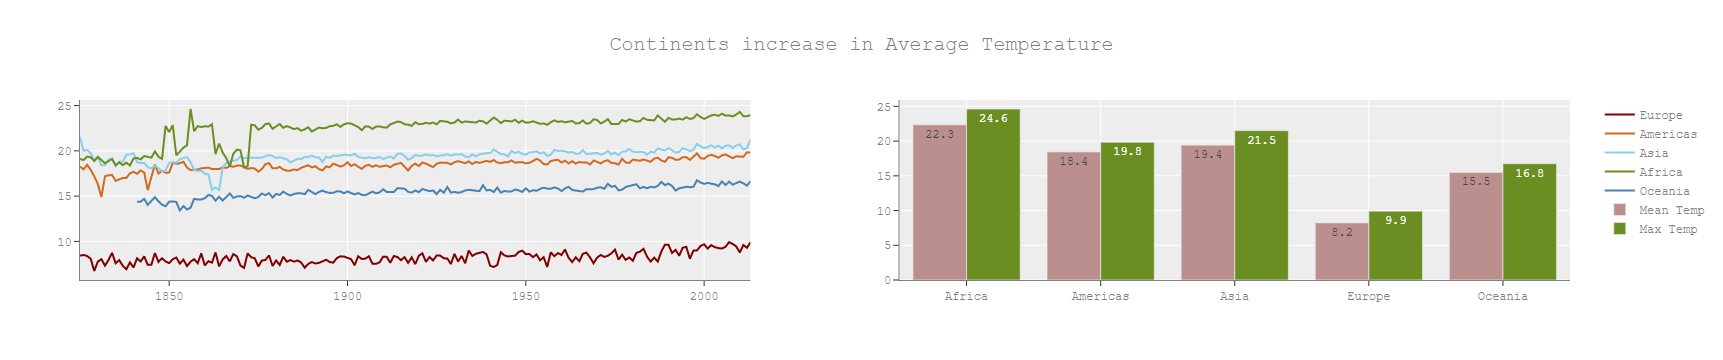

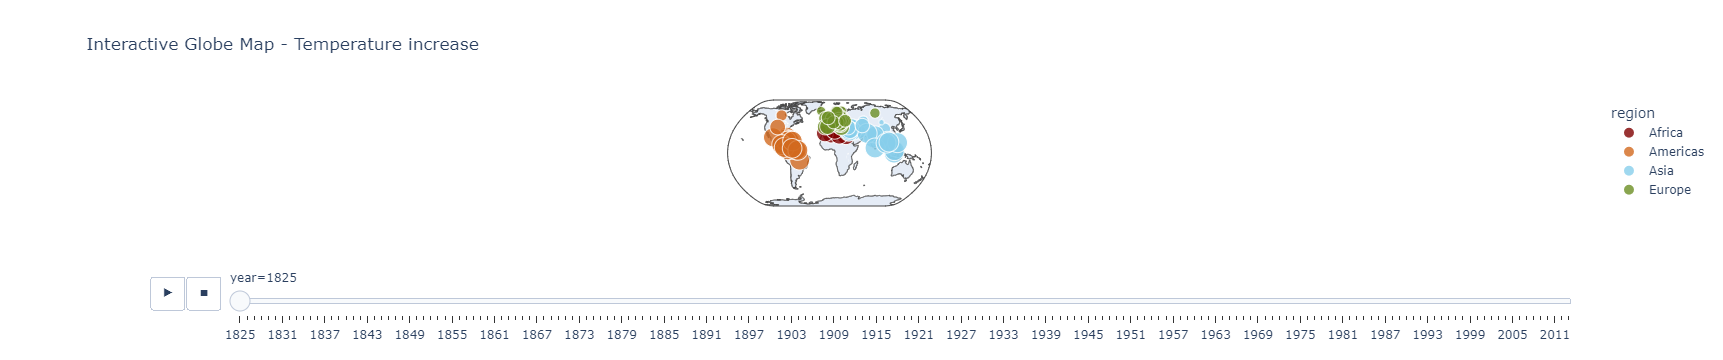

In [38]:
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Continents increase in Average Temperature", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Bar =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Mean Temp', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Max Temp', marker_color = 'rgb(107,142,35)', text = y2, textposition = 'auto'),
              row = 1, col = 2)
fig.show()

# Data - we need iso alpha-3 codes
map_countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

# Min temperature is -5.453083, and because the size in a map cannot be negative, we will add 6 to all temperatures
# to "standardize the data"
map_countries['AverageTemperature'] = map_countries['AverageTemperature'] + 6

fig = px.scatter_geo(map_countries, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'),
                     hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='Interactive Globe Map - Temperature increase')
fig.show()

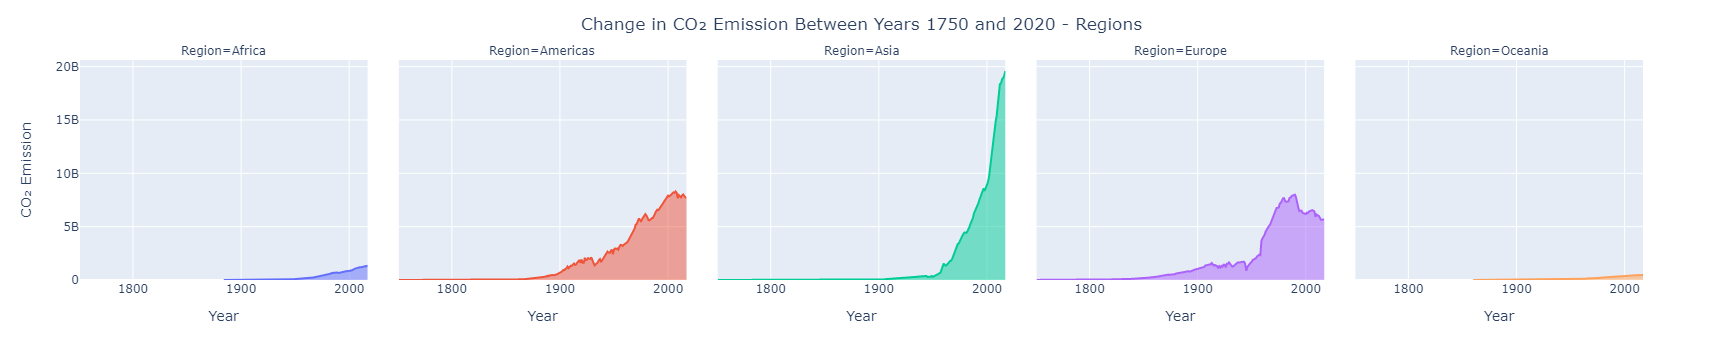

In [39]:
df_co = pd.read_csv("X:\Fall21\INFO6105\Final_Project\data-society-global-climate-change-data\co2_emission.csv", parse_dates = ['Year'])
df_co_na = df_co[df_co['Code'].isnull()]
df_co_na['Entity'].unique()
# Create new data frames for Kyrgysztan and Wallis and Futuna Islands and fill their Code column with their codes

df_kgz = df_co[df_co["Entity"].isin(["Kyrgysztan"])]
df_kgz.fillna('KGZ', inplace = True)

df_wlf = df_co[df_co["Entity"].isin(["Wallis and Futuna Islands"])]
df_wlf.fillna('WLF', inplace = True)
# Drop the rows containing NaN values in their Code column (including the )
# Since Code column is the only column containing NaN, we can directly apply dropna method

df_co.dropna(inplace=True)
# Append all 3 data frames
df = pd.concat([df_co, df_kgz, df_wlf])

# Sort values by Country
df.sort_values(['Entity', 'Year'])

df.reset_index(level=0, inplace=True)

del df["index"]
# Read the dataset into a data frame
df_inf = pd.read_csv(r"X:\Fall21\INFO6105\Final_Project\data-society-global-climate-change-data\continents2.csv", usecols=["alpha-3", "region", "sub-region"])

# Rename the column of data frame
df_inf.rename(columns={'alpha-3':'Code', 'region':'Region', 'sub-region':'Sub-Region'}, inplace=True)

df_merged = pd.merge(df, df_inf, how='left', on='Code')

df_merged = pd.merge(df, df_inf, how='left', on='Code')
df_merged = pd.merge(df, df_inf, how='left', on='Code')
df_merged = pd.merge(df, df_inf, how='left', on='Code')
renew=pd.read_csv(r"X:\Fall21\INFO6105\Final_Project\Data\Renew.csv")
fin=pd.merge(renew,df_merged,how='left',on='Code')
fin
# Group the data frame by Code and Entity columns and sum the CO2 emission
total_reg = df_merged.groupby(["Region", "Year"])["Annual CO₂ emissions (tonnes )"].sum()
# Create a data frame from the resulting series
df_reg = pd.DataFrame(total_reg)
# Resulting data frame will have 2 index columns: Code and Entity
# We should reset the index to convert them into columns
df_reg.reset_index(level=0, inplace=True)
df_reg.reset_index(level=0, inplace=True)

fig = px.area(df_reg,
              x="Year",
              y="Annual CO₂ emissions (tonnes )",
              color="Region",
              facet_col="Region",
              facet_col_wrap=5,
              labels={'Entity':'Country','Annual CO₂ emissions (tonnes )':'CO₂ Emission'},
              height=350)

# Update the title and adjust its location
fig.update_layout(title="Change in CO₂ Emission Between Years 1750 and 2020 - Regions",
                  title_x=0.50)

# Remove the legend
fig.update_layout(showlegend = False)

# Show the figure
fig.show()

<div class="alert alert-block alert-info">
<b>Dataset spliting and feature selection</b>
</div>


# What is XGBoost

**XGBoost** is the leading model for working with standard tabular data (the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). XGBoost models dominate many Kaggle competitions. 
To reach peak accuracy, XGBoost models require more knowledge and  _model tuning_ than techniques like Random Forest. After this tutorial, you'ill be able to 
- Follow the full modeling workflow with XGBoost 
- Fine-tune XGBoost models for optimal performance

XGBoost is an implementation of the **Gradient Boosted Decision Trees** algorithm (scikit-learn has another version of this algorithm, but XGBoost has some technical advantages.)  What is **Gradient Boosted Decision Trees**?  We'll walk through a diagram.

We go through cycles that repeatedly builds new models and combines them into an **ensemble** model.  We start the cycle by calculating the errors for each observation in the dataset.  We then build a new model to predict those.  We add predictions from this error-predicting model to the "ensemble of models."  
To make a prediction, we add the predictions from all previous models.  We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.
There's one piece outside that cycle.  We need some base prediction to start the cycle. In practice, the initial predictions can be pretty naive. Even if it's predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.

# Model Tuning

XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed.  The first parameters you should understand are:

### n_estimators and early_stopping_rounds
**n_estimators** specifies how many times to go through the modeling cycle described above.  

In the [underfitting vs overfitting graph](http://i.imgur.com/2q85n9s.png), n_estimators moves you further to the right.  Too low a value causes underfitting, which is inaccurate predictions on both training data and new data. Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about). You can experiment with your dataset to find the ideal.  Typical values range from 100-1000, though this depends a lot on the **learning rate** discussed below.
The argument **early_stopping_rounds** offers a way to automatically find the ideal value. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators.  It's smart to set a high value for **n_estimators** and then use **early_stopping_rounds** to find the optimal time to stop iterating.
Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping.  **early_stopping_rounds = 5** is a reasonable value.  Thus we stop after 5 straight rounds of deteriorating validation scores.
When using **early_stopping_rounds**, you need to set aside some of your data for checking the number of rounds to use.  If you later want to fit a model with all of your data, set **n_estimators** to whatever value you found to be optimal when run with early stopping.

### learning_rate
Here's a subtle but important trick for better XGBoost models:
Instead of getting predictions by simply adding up the predictions from each component model, we will multiply the predictions from each model by a small number before adding them in.  This means each tree we add to the ensemble helps us less.  In practice, this reduces the model's propensity to overfit.
So, you can use a higher value of **n_estimators** without overfitting.  If you use early stopping, the appropriate number of trees will be set automatically.
In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.
### n_jobs
On larger datasets where runtime is a consideration, you can use parallelism to build your models faster.  It's common to set the parameter **n_jobs** equal to the number of cores on your machine.  On smaller datasets, this won't help. 
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.
XGBoost has a multitude of other parameters, but these will go a very long way in helping you fine-tune your XGBoost model for optimal performance.

In [40]:
#Dataset for final hyperparameter tuning
data_all=pd.read_excel(r"X:\Fall21\INFO6105\Final_Project\all_data.xlsx")
date=data_all['Date']
data_all.drop('Date',axis=1,inplace=True)
data_all.isnull().sum()
data_all.fillna(0,inplace=True)
data_all.head(5)
X=data_all.drop('co2',axis=1)
y=data_all['co2']
y_mean=y.mean()
y[y<y_mean]=0
y[y>=y_mean]=1

##### Before using the models we must set the parameters for the model, we do so but using grid search CV for our model:
>  We supply the model with an array of features.
>  Then the grid search iterates through every possible combination of the features and provides with the result.
>  Finally, it provides us with the optimal hyperparameters to be used..

<div class="alert alert-block alert-info">
<b>Hyperparameter tuning </b>
</div>

In [44]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
#     print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
trials = Trials()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials,
                       verbose=False)
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

The best hyperparameters are :  

{'colsample_bytree': 0.5564161870927843, 'gamma': 1.0061237680706974, 'max_depth': 18.0, 'min_child_weight': 8.0, 'reg_alpha': 42.0, 'reg_lambda': 0.23668654803368686}


<div class="alert alert-block alert-success">
<b>Hyperparameter tuning:</b> SUCCESS 
</div>

In [ ]:
data_all=pd.read_excel(r"X:\Fall21\INFO6105\Final_Project\all_data.xlsx")
date=data_all['Date']
data_all.drop('Date',axis=1,inplace=True)
data_all.isnull().sum()
data_all.fillna(0,inplace=True)
data_all.head(5)
X=data_all.drop('co2',axis=1)
y=data_all['co2']
# Creating test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=0)

# Fitting the training set into the hyper tuned XGBoost claassifier model                                                    
clf=xgb.XGBClassifier(colsample_bytree= 0.9378052551666743, gamma= 1.1618446072010755,max_depth= 11,min_child_weight= 4.0,reg_alpha= 43.0,reg_lambda= 0.7876079976135093)
evaluation = [( X_train, y_train), ( X_test, y_test)]
clf.fit(X_train, y_train,verbose=False)
model = classifier.fit(X_train, y_train)
predictions = model.predict(X_test)

<div class="alert alert-block alert-info">
<b>XGBoost classifier prediction </b>
</div>

In [ ]:
# Converting the predictions to series and then to dataframe
preds=pd.Series(predictions)
type(preds)
ytest=pd.Series(y_test,name='y_test')
ytest.reset_index(drop=True,inplace=True)
ytest=ytest.to_frame()
ytest
final_out=pd.DataFrame(date)
final_out=final_out.loc[17642:]
final_out.reset_index(drop=True,inplace=True)
predicts=pd.DataFrame(preds,columns=['Predictions'])
frames=[final_out,predicts,ytest]
# Final dataset with y_test,predictions and date
result=pd.concat(frames,axis=1)
result
fig = px.line(result,x='Date',y=result.columns[1:])
# fig.add_scatter(result,x='Date', y='y_test')
# fig = px.line(result,x='Date',y='y_test')
fig.show()

<div class="alert alert-block alert-warning">
<b>Arima Model</b></div>

##### Arima Model :

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values. For example, an ARIMA model might seek to predict a stock's future prices based on its past performance or forecast a company's earnings based on past periods.

A) Autoregressive part

Autoregressive part refers to relationship between the variable (that we are trying to forecast) with its own lagged values. The order of AR term is denoted by p. If p=2, that means the variable depends upon past two lagged values. In case of seasonal ARIMA model, the seasonal AR part is denoted by the notation P

B) Integrated part

Integrated part refers to order of differencing. Non-seasonal differencing order is denoted by d and seasonal differencing order by D. Integrated part is essential when the series is non-stationary.

C) Moving Average part

In ARIMA model, Moving Average order indicates the dependence of present value of the time series variable on the lagged error terms. The non-seasonal MA order is denoted by q while the seasonal MA order is denoted by Q.

The order of MA part can be inferred from the Auto-Correlation Function (ACF) plot.

In [69]:
# Loading Datasets
df1 = pd.read_csv(r"C:\Users\negis\Downloads\GlobalTemperatures1.csv")
df2 = pd.read_csv(r"C:\Users\negis\Downloads\GlobalTemperatures2.csv")
df3 = pd.read_csv(r"C:\Users\negis\Downloads\co2_1 (1).csv")
df4 = pd.read_csv(r"C:\Users\negis\Downloads\co2_2_1.csv")
# print(df1.head())
# print(df2.head())
print(df3.head())
print(df4.head())

         Date  SumofAnnualCOemissions
0  01-01-1751                28051584
1  01-01-1752                28062576
2  01-01-1753                28062576
3  01-01-1754                28073568
4  01-01-1755                28084560
       Date  SumofAnnualCOemissions
0  1/1/1900              5108103312
1  1/1/1901              5239882736
2  1/1/1902              5351425888
3  1/1/1903              5785419360
4  1/1/1904              5861179888


In [70]:
#Dataset manupulation
df1['dt'] = pd.to_datetime(df1['dt'], format='%Y-%m-%d')
df2['dt'] = pd.to_datetime(df2['dt'], format='%d/%m/%Y')
print(df1.head())
print(df2.head())
df_1 = pd.concat([df1,df2])
df_1 = df_1[["dt","AverageTemperature"]]
df_1 = df_1.dropna()
print(df_1.head())
print(df_1.tail())

df3['Date'] = pd.to_datetime(df3['Date'], format='%d-%m-%Y')
df4['Date'] = pd.to_datetime(df4['Date'])
print(df1.head())
print(df2.head())
df_2 = pd.concat([df3,df4])
df_2 = df_2[["Date","SumofAnnualCOemissions"]]
df_2 = df_2.dropna()
print(df_2.head())
print(df_2.tail())
df_1.index = df_1['dt']
del df_1['dt']
print(df_1.head())
df_2.index = df_2['Date']
del df_2['Date']
print(df_2.head())

          dt  AverageTemperature  AverageTemperatureUncertainty
0 1796-01-01              17.044                          2.044
1 1796-02-01              19.193                          1.359
2 1796-03-01              22.319                          2.125
3 1796-04-01              27.233                          1.510
4 1796-05-01              30.035                          1.338
          dt  AverageTemperature  AverageTemperatureUncertainty
0 1900-01-01              17.385                          0.651
1 1900-01-02              20.050                          0.694
2 1900-01-03              24.958                          0.463
3 1900-01-04              27.672                          0.491
4 1900-01-05              29.772                          0.237
          dt  AverageTemperature
0 1796-01-01              17.044
1 1796-02-01              19.193
2 1796-03-01              22.319
3 1796-04-01              27.233
4 1796-05-01              30.035
             dt  AverageTemperatur

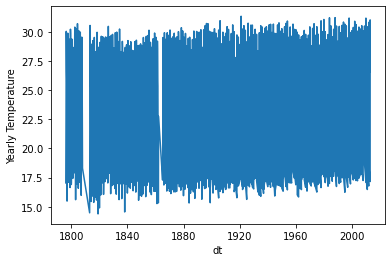

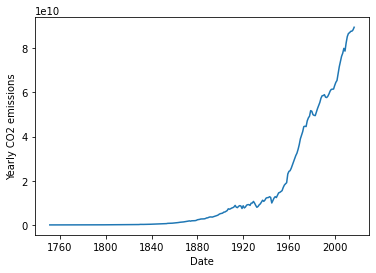

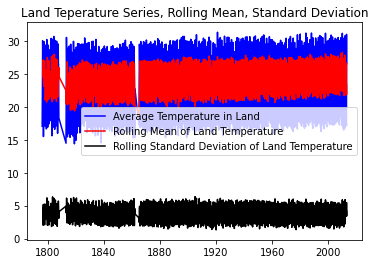

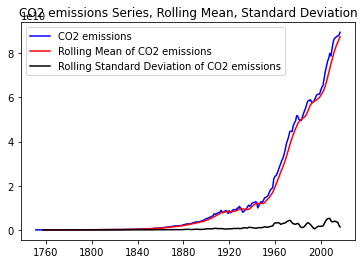

In [71]:
df_1.columns
df_2.columns
full = df_2
sns.lineplot(data=df_1, x=df_1.index, y="AverageTemperature")
plt.ylabel('Yearly Temperature')
plt.show()
sns.lineplot(data=df_2, x=df_2.index, y="SumofAnnualCOemissions")
plt.ylabel('Yearly CO2 emissions')
plt.show()
rolling_mean = df_1.rolling(7).mean()
rolling_std = df_1.rolling(7).std()
plt.plot(df_1, color='blue',label="Average Temperature in Land")
plt.plot(rolling_mean, color='red', label="Rolling Mean of Land Temperature")
plt.plot(rolling_std, color='black', label = "Rolling Standard Deviation of Land Temperature")
plt.title("Land Teperature Series, Rolling Mean, Standard Deviation")
plt.legend(loc='best')
plt.show()
rolling_mean = df_2.rolling(7).mean()
rolling_std = df_2.rolling(7).std()
plt.plot(df_2, color='blue',label="CO2 emissions")
plt.plot(rolling_mean, color='red', label="Rolling Mean of CO2 emissions")
plt.plot(rolling_std, color='black', label = "Rolling Standard Deviation of CO2 emissions")
plt.title("CO2 emissions Series, Rolling Mean, Standard Deviation")
plt.legend(loc='best')
plt.show()

#### Statistical analysis

       Values                    Metric
0    2.371837  Test Statistics selected
1    0.998996                   p-value
2    7.000000            The used lags 
3  259.000000      Recorded data points
4   -3.455853    critical value of (1%)
5   -2.872765    critical value of (5%)
6   -2.572752   critical value of (10%)
       Values                    Metric
0    2.371837  Test Statistics selected
1    0.998996                   p-value
2    7.000000            The used lags 
3  259.000000      Recorded data points
4   -3.455853    critical value of (1%)
5   -2.872765    critical value of (5%)
6   -2.572752   critical value of (10%)
Lag for one month:  0.8127866927157554
Lag for one month:  0.9996142471130237
Lag for Three Months:  -0.09767871500380386
Lag for Six Months:  -0.7445849424864949
Lag for Nine Months Lag:  -0.0804002775137259
Lag for Three Months:  0.9983148650341584
Lag for Six Months:  0.9958342215924764
Lag for Nine Months Lag:  0.9925063536325129


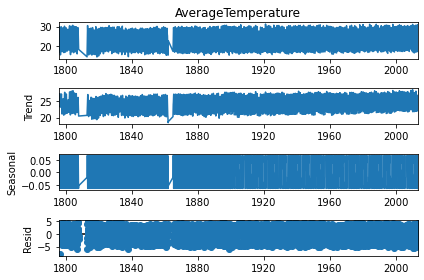

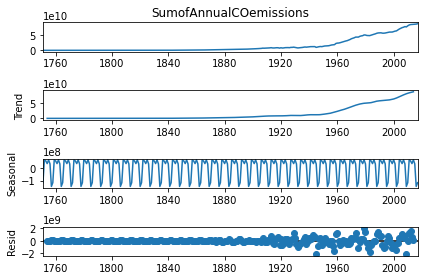

In [72]:
adft = adfuller(df_1,autolag="AIC")
adft = adfuller(df_2,autolag="AIC")
output_df_1 = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics selected","p-value","The used lags ","Recorded data points",
"critical value of (1%)", "critical value of (5%)", "critical value of (10%)"]})
print(output_df_1)

output_df_2 = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics selected","p-value","The used lags ","Recorded data points",
"critical value of (1%)", "critical value of (5%)", "critical value of (10%)"]})
print(output_df_2)
autocorrelation_lag_one = df_1['AverageTemperature'].autocorr(lag=1)
print("Lag for one month: ", autocorrelation_lag_one)

autocorrelation_lag_one = df_2['SumofAnnualCOemissions'].autocorr(lag=1)
print("Lag for one month: ", autocorrelation_lag_one)
autocorrelation_lag_three = df_1['AverageTemperature'].autocorr(lag=3)
print("Lag for Three Months: ", autocorrelation_lag_three)
autocorrelation_lag_six = df_1['AverageTemperature'].autocorr(lag=6)
print("Lag for Six Months: ", autocorrelation_lag_six)
autocorrelation_lag_nine = df_1['AverageTemperature'].autocorr(lag=9)
print("Lag for Nine Months Lag: ", autocorrelation_lag_nine)

autocorrelation_lag_three = df_2['SumofAnnualCOemissions'].autocorr(lag=3)
print("Lag for Three Months: ", autocorrelation_lag_three)
autocorrelation_lag_six = df_2['SumofAnnualCOemissions'].autocorr(lag=6)
print("Lag for Six Months: ", autocorrelation_lag_six)
autocorrelation_lag_nine = df_2['SumofAnnualCOemissions'].autocorr(lag=9)
print("Lag for Nine Months Lag: ", autocorrelation_lag_nine)
decompose = seasonal_decompose(df_1['AverageTemperature'],model='additive', period=7)
decompose.plot()
plt.show()
decompose = seasonal_decompose(df_2['SumofAnnualCOemissions'],model='additive', period=7)
decompose.plot()
plt.show()

> #### Test & train dataset

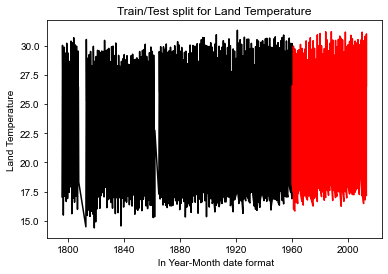

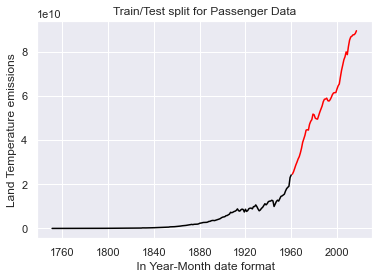

In [73]:
df_1['Date'] = df_1.index
train_1 = df_1[df_1['Date'] < pd.to_datetime('01-08-1960', format='%d-%m-%Y')]
train_1['train'] = train_1['AverageTemperature']
del train_1['Date']
del train_1['AverageTemperature']
test_1 = df_1[df_1['Date'] >= pd.to_datetime("08-01-1960", format='%d-%m-%Y')]
del test_1['Date']
test_1['test'] = test_1['AverageTemperature']
del test_1['AverageTemperature']
plt.plot(train_1, color = "black")
plt.plot(test_1, color = "red")
plt.title("Train/Test split for Land Temperature")
plt.ylabel("Land Temperature")
plt.xlabel(' In Year-Month date format')
sns.set()
plt.show()
df_2['Date'] = df_2.index
full = df_2
train_2 = df_2[df_2['Date'] < pd.to_datetime('01-08-1960', format='%d-%m-%Y')]
train_2['train'] = train_2['SumofAnnualCOemissions']
del train_2['Date']
del train_2['SumofAnnualCOemissions']
test_2 = df_2[df_2['Date'] >= pd.to_datetime("01-08-1960", format='%d-%m-%Y')]
del test_2['Date']
test_2['test'] = test_2['SumofAnnualCOemissions']
del test_2['SumofAnnualCOemissions']
plt.plot(train_2, color = "black")
plt.plot(test_2, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Land Temperature emissions")
plt.xlabel(' In Year-Month date format')
sns.set()
plt.show()

> #### Loading the train and test into model

In [74]:
model1 = pm.auto_arima(train_1, trace=True, error_action='ignore', suppress_warnings=True)
model1.fit(train_1)
forecast = model1.predict(n_periods=len(test_1))
forecast1 = pd.DataFrame(forecast,index = test_1.index,columns=['Prediction'])

model2 = pm.auto_arima(train_2, trace=True, error_action='ignore', suppress_warnings=True)
model2.fit(train_2)
forecast = model2.predict(n_periods=len(test_2))
forecast2 = pd.DataFrame(forecast,index = test_2.index,columns=['Prediction'])
rms1 = sqrt(mean_squared_error(test_1,forecast1))
print("RMSE: ", rms1)

rms2 = sqrt(mean_squared_error(test_2,forecast2))
print("RMSE: ", rms2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8993.539, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7986.442, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8021.965, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8991.539, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7538.006, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7408.521, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7410.511, Time=0.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7411.829, Time=1.89 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=7406.521, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7536.006, Time=0.22 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=7408.511, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Ti

<div class="alert alert-block alert-success">
<b>ARIMA Prediction:</b> SUCCESS 
</div>

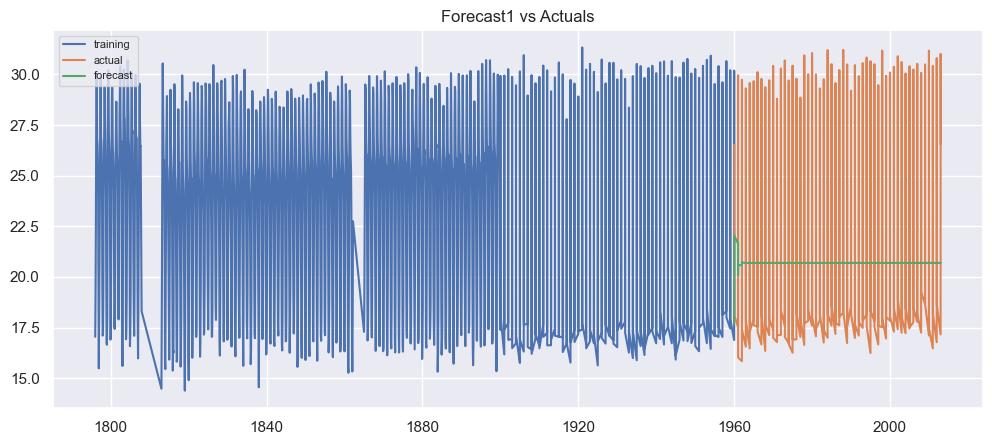

In [75]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_1, label='training')
plt.plot(test_1, label='actual')
plt.plot(forecast1, label='forecast')
plt.title('Forecast1 vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

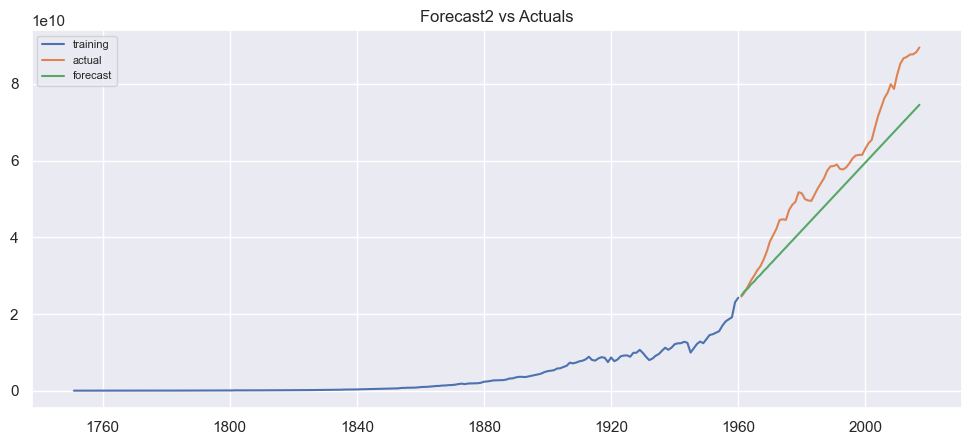

In [76]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_2, label='training')
plt.plot(test_2, label='actual')
plt.plot(forecast2, label='forecast')
plt.title('Forecast2 vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<div class="alert alert-block alert-warning">
<b>SARIMA Model</b></div>

### The difference between ARIMA and SARIMA (SARIMAX) is about the seasonality of the dataset. 
	•  If your data is seasonal, like it happen after a certain period of time then we will use SARIMA.
	•  Time series is a series of data points measured at consistent time intervals such as yearly, daily, monthly, hourly and so on.
	•  It is time-dependent & the progress of time is an important aspect of the data set.
	•  One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for Auto Regressive Integrated Moving Average.
	• ARIMA is a model that can be fitted to time series data to predict future points in the series.

We can split the Arima term into three terms, AR, I, MA:

	• AR(p) stands for the autoregressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.
	• I(d) is the differencing part, the d parameter tells how many differencing orders are going to be used to make the series stationary.
	• MA(q) stands for moving average model, the q is the number of lagged forecast error terms in the prediction equation. 
	• SARIMA is seasonal ARIMA and it is used with time series with seasonality.


There are a few steps to implement an ARIMA model:
 
	1.  Load the data & Import the necessary libraries : math:Sqrt,
                                                        sklearn.metrics:mean_squared_error,
                                                        Pmdarima-->An ARIMA estimator.
                                                        statsmodels.tsa.seasonal:seasonal_decompose -->  Seasonal decomposition using moving averages.
                                                        statsmodels.tsa.stattools:adfuller,
                                                        matplotlib.pyplot,seaborn etc.
    2.  Data Preprocessing : While working with time series data in Python, it’s important to always ensure that dates are used as index values and are understood by Python as a true “date” object. We can do this by using pandas datestamp or to_datetime method.

    3.  Check for stationarity : Most time series models require the data to be stationary. A time series is said to be stationary if its statistical properties such as mean, variance & covariance remain constant over time. The formal ways to check for this are plotting the data and do a visual analysis and use a statistical test.
		* Visual: we can use the decomposition method which allows us to separately view seasonality (which could be daily, weekly, annual, etc), trend and random which is      the variability in the data set after removing the effects of the seasonality and trend.
	
    


> #### Loading the train and test into model

In [77]:
# fitting the sarima model
#is the same way as ARIMA but now the seasonality is equal to true
smodel1 = pm.auto_arima(train_1, start_p=1, start_q=1,
                         test_1='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=5337.594, Time=3.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6247.775, Time=0.26 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5414.452, Time=1.65 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5531.481, Time=1.92 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6245.793, Time=0.19 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=5559.350, Time=0.89 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=5339.135, Time=3.69 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=5339.243, Time=10.32 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=5357.312, Time=2.77 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=5340.753, Time=14.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=5403.868, Time=1.37 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=5160.757, Time=8.93 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=5467.018, Time=2.95 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=5158.844, Time=12.33 sec
 ARIMA(2,0,1)(1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1876
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 12)   Log Likelihood               -2562.092
Date:                            Tue, 14 Dec 2021   AIC                           5138.184
Time:                                    13:34:11   BIC                           5176.897
Sample:                                         0   HQIC                          5152.449
                                           - 1876                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4536      0.015     94.764      0.000       1.423       1.484
ar.L2         -0.7083      0.011    -66.538      0.000      -0.729      -0.687
ma.L1         -0.7011      0.021    -32.897      0.000      -0.743      -0.659
ar.S.L12       0.3342      0.032     10.354      0.000       0.271       0.397
ar.S.L24       0.1892      0.029      6.608      0.000       0.133       0.245
ma.S.L12      -0.8637      0.029    -29.804      0.000      -0.921      -0.807
sigma2         0.9116      0.014     65.190      0.000       0.884       0.939
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7092.95
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# fitting the sarima model
#is the same way as ARIMA but now the seasonality is equal to true
smodel2 = pm.auto_arima(train_2, start_p=1, start_q=1,
                         test_2='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel2.summary()

> #### Model Results

In [79]:
forecast1 = smodel1.predict(n_periods=len(test_1))
forecast1 = pd.DataFrame(forecast1,index = test_1.index,columns=['Prediction'])

rms1 = sqrt(mean_squared_error(test_1,forecast1))
print("RMSE: ", rms1)

forecast2 = smodel2.predict(n_periods=len(test_2))
forecast2 = pd.DataFrame(forecast2,index = test_2.index,columns=['Prediction'])

rms2 = sqrt(mean_squared_error(test_2,forecast2))
print("RMSE: ", rms2)
print(full.head(5))

RMSE:  7.7682561062209885


<div class="alert alert-block alert-success">
<b>SARIMA Prediction:</b> SUCCESS 
</div>

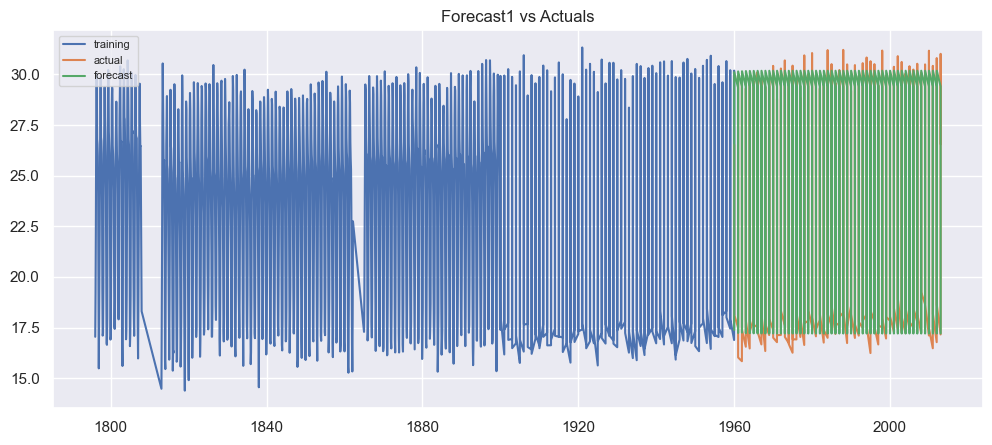

In [80]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_1, label='training')
plt.plot(test_1, label='actual')
plt.plot(forecast1, label='forecast')
plt.title('Forecast1 vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_2, label='training')
plt.plot(test_2, label='actual')
plt.plot(forecast2, label='forecast')
plt.title('Forecast2 vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()